In [1]:
# Density based spatial clustering (not distance-based)
    # two hyperparameters - epsilon and minimum number of points
    # Point types - core, border, outlier
        # randomly select a core point (then iteratively identify other core/ border points)
        # epsilon = distance from core point
        # If number of points w/n that range meet the criteria => point = 'core', o/w 'border'
        # 'Outlier' - point not within the epsilon range. classified as 'noise'
# Online visualization -https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_columns=None

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

## Overview of DBSCAN vs. K-Means models

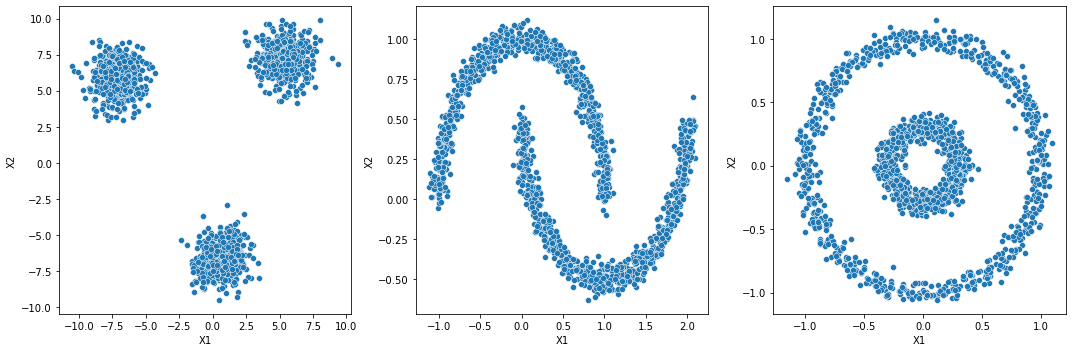

In [3]:
blobs = pd.read_csv('../../github/python-data-science/data/cluster_blobs.csv')
moons = pd.read_csv('../../github/python-data-science/data/cluster_moons.csv')
circles = pd.read_csv('../../github/python-data-science/data/cluster_circles.csv')

plt.figure(figsize=(15,5))
plt.subplot(1,3,1); sns.scatterplot(data = blobs, x='X1', y='X2');
plt.subplot(1,3,2); sns.scatterplot(data = moons, x='X1', y='X2');
plt.subplot(1,3,3); sns.scatterplot(data = circles, x='X1', y='X2');
plt.tight_layout()

In [4]:
def display_categories(model, data):
    label = model.fit_predict(data)
    sns.scatterplot(data = data, x='X1', y='X2', hue=label, palette='Set1');

### >> K-Means

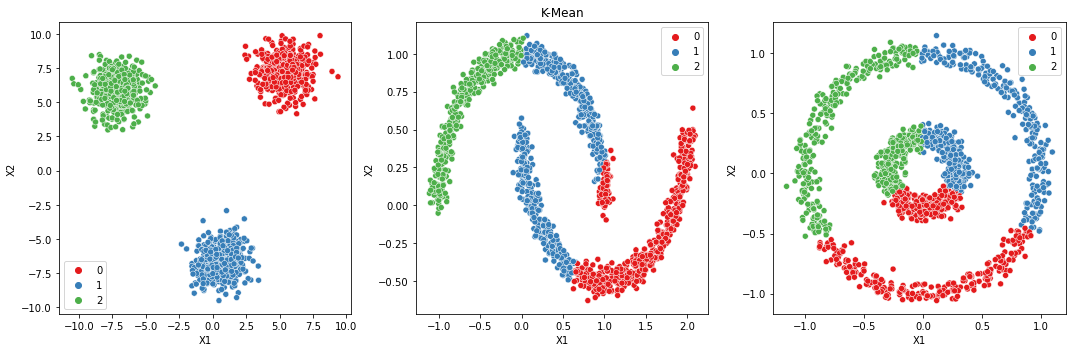

In [5]:
km = KMeans(n_clusters=3)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1); display_categories(km, blobs)
plt.subplot(1,3,2); display_categories(km, moons); plt.title('K-Mean')
plt.subplot(1,3,3); display_categories(km, circles)
plt.tight_layout()

### >> DBSCAN

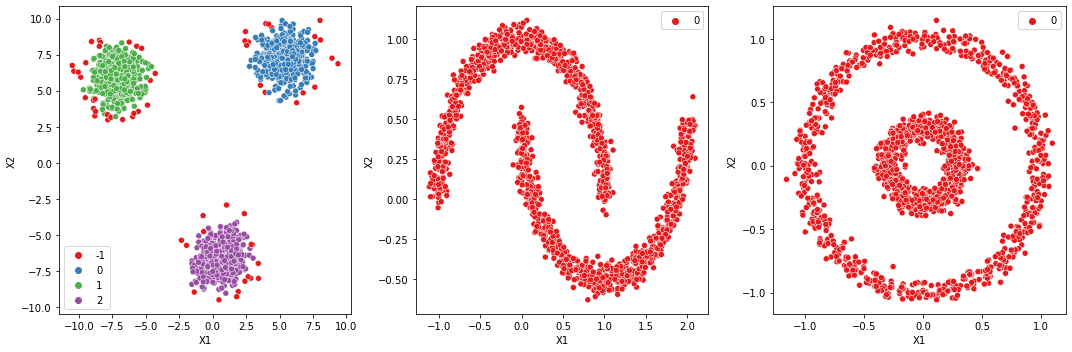

In [6]:
dbscan = DBSCAN(eps=0.5,min_samples=5,)  # default parameters

plt.figure(figsize=(15,5))
plt.subplot(1,3,1); display_categories(dbscan, blobs)  # -1 = outliers
plt.subplot(1,3,2); display_categories(dbscan, moons)
plt.subplot(1,3,3); display_categories(dbscan, circles)
plt.tight_layout()

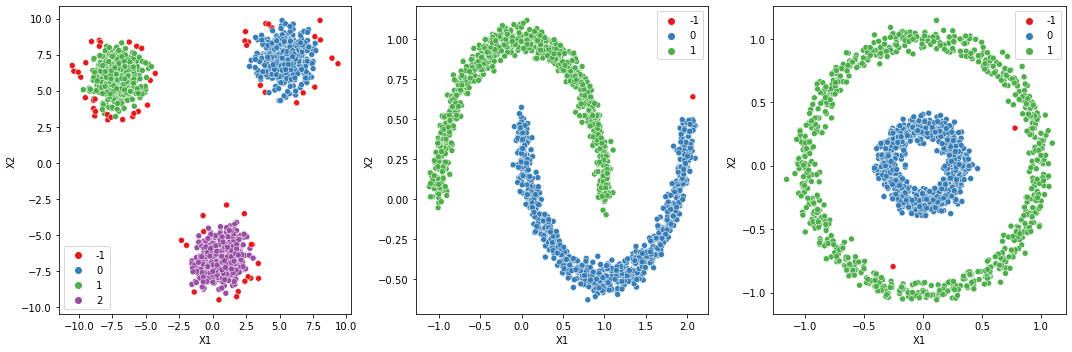

In [7]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=.1, min_samples=5)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1); display_categories(DBSCAN(eps=0.5, min_samples=5), blobs)
plt.subplot(1,3,2); display_categories(dbscan, moons)
plt.subplot(1,3,3); display_categories(dbscan, circles)
plt.tight_layout()

### >> Parameter Tuning - *using elbow method*

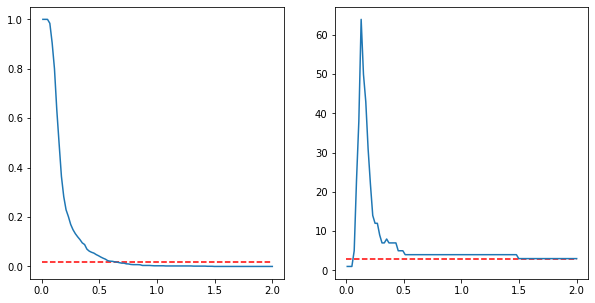

In [8]:
labels = np.array([])
outliers = np.array([])
space = np.linspace(.01,2,100)

for e in space:
    model = DBSCAN(eps=e, min_samples=5)
    label = model.fit_predict(blobs)
    labels = np.append(labels, len(np.unique(label)))
    outliers = np.append(outliers,(label==-1).sum())

# Elbow method - visually inspect for a reasonable number of 'outliers' and 'labels'
plt.figure(figsize=(10,5))
plt.subplot(1,2,1); sns.lineplot(x=space, y=outliers/1500); plt.hlines(y=.02, xmin=0, xmax=2, color='red', linestyle='--');
plt.subplot(1,2,2); sns.lineplot(x=space, y=labels); plt.hlines(y=3, xmin=0, xmax=2, color='red', linestyle='--');

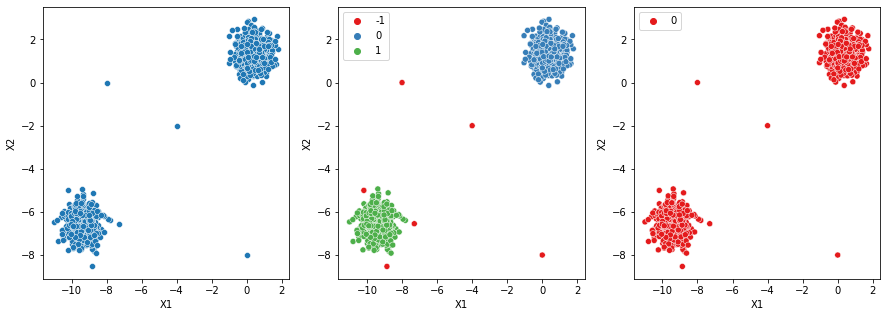

In [9]:
blobs_outlier = pd.read_csv('../../github/python-data-science/data/cluster_two_blobs_outliers.csv')

plt.figure(figsize=(15,5))
plt.subplot(1,3,1); sns.scatterplot(data = blobs_outlier, x='X1', y='X2');
plt.subplot(1,3,2); display_categories(DBSCAN(), blobs_outlier)
plt.subplot(1,3,3); display_categories(DBSCAN(eps=10, min_samples=5), blobs_outlier)
# the solution lies somewhere between chart 2 and 3

---
## Dataset - [Wholesale Customers](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers)

In [10]:
df = pd.read_csv('../../github/python-data-science/data/wholesome_customers_data.csv')

In [11]:
# Attribute Information:

# 1) FRESH: annual spending (m.u.) on fresh products (Continuous);
# 2) MILK: annual spending (m.u.) on milk products (Continuous);
# 3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
# 4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
# 5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
# 6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
# 7) CHANNEL: customers Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)
# 8) REGION: customers Region Lisbon, Oporto or Other (Nominal)

In [12]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [14]:
df['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [15]:
df['Region'].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

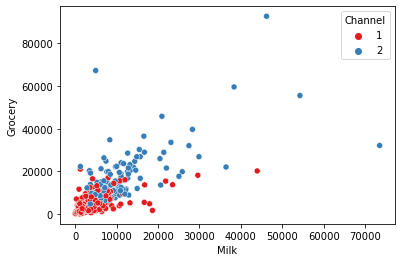

In [16]:
sns.scatterplot(data=df, x='Milk', y='Grocery', hue='Channel', palette='Set1');

<AxesSubplot:xlabel='Milk', ylabel='Count'>

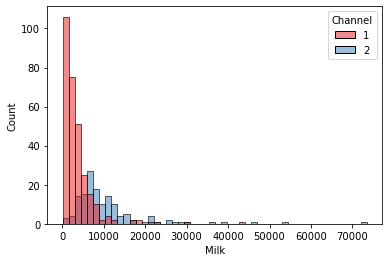

In [17]:
sns.histplot(data=df, x='Milk', hue='Channel', palette='Set1', )

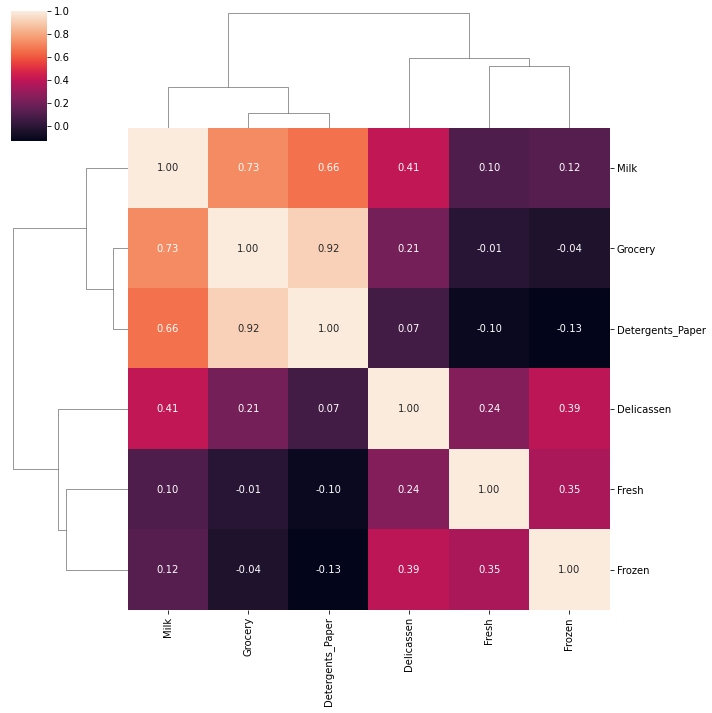

In [18]:
sns.clustermap(df.drop(columns=['Region', 'Channel']).corr(), annot=True, fmt='.2f',
              row_cluster= True);

In [19]:
# Channel shows distinction on amount spent per category, which is to be expected (HoReCa >> Retail)
# sns.pairplot(df, hue='Channel', palette='Set1', corner=True);

In [20]:
# Region - no clear pattern. No initial expectation either.
# sns.pairplot(df, hue='Region', palette='Set1', corner=True);

### Clustering excluding known 'Channel' / 'Regions' columns

In [21]:
df.head(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776


In [22]:
col_drop = ['Channel', 'Region']

scaler = StandardScaler()
scaled_x = scaler.fit_transform(df.drop(columns=col_drop))
scaled_x.shape

(440, 6)

In [23]:
pd.DataFrame(scaled_x, columns =  df.drop(columns=col_drop).columns).agg([min, max, np.std])

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
min,-0.949683,-0.778795,-0.837334,-0.628343,-0.604416,-0.540264
max,7.927738,9.183650,8.936528,11.919002,7.967672,16.478447
std,1.001138,1.001138,1.001138,1.001138,1.001138,1.001138


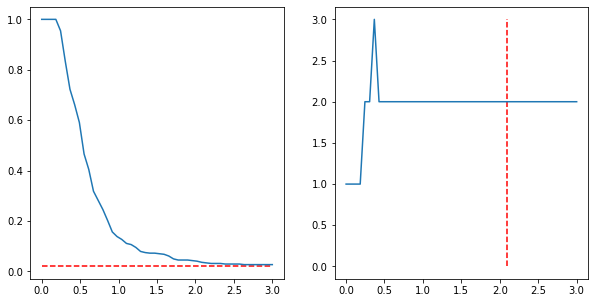

In [24]:
labels = []
outliers = []
space = np.linspace(.001,3,50)

for e in space:
    model = DBSCAN(eps=e, min_samples=scaled_x.shape[1]*2)
    label = model.fit_predict(scaled_x)
    labels.append(len(np.unique(label)))
    outliers.append((label==-1).sum()/scaled_x.shape[0])

# Elbow method - visually inspect for a reasonable number of 'outliers' and 'labels'
plt.figure(figsize=(10,5))

plt.subplot(1,2,1); 
sns.lineplot(x=space, y=outliers); 
plt.hlines(y=.02, xmin=space.min(), xmax=space.max(), color='red', linestyle='--');

plt.subplot(1,2,2); 
sns.lineplot(x=space, y=labels); 
plt.vlines(x=2.1, ymin=0, ymax=3, color='red', linestyle='--'); 

In [25]:
# Lets pick eps = ~2
e = 2.1
n = scaled_x.shape[1]*2
model = DBSCAN(eps=e, min_samples=n)
label_db = model.fit_predict(scaled_x)
outliers = (label==-1).sum()/df.shape[0]
print('Outliers percentage {:.2f}'.format(outliers*100))

Outliers percentage 2.73


In [26]:
# Does NOT do a good job with this dataset. Detecs outliers, but not clusters.

df['label_db'] = label_db
df['label_db'].value_counts()

 0    424
-1     16
Name: label_db, dtype: int64

In [27]:
# We get two clusters which are essentially the two Channels - with different spending
# pattern across categories. Region-wise not much distinction, also because most of the data is 
# for region #3

df.groupby(by='label_db').mean().round(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
label_db,,,,,,,,
-1,1.56,2.62,31471.75,26834.94,33672.19,12952.0,14343.94,8376.38
0,1.31,2.54,11265.53,5002.35,6980.68,2699.1,2448.95,1266.32


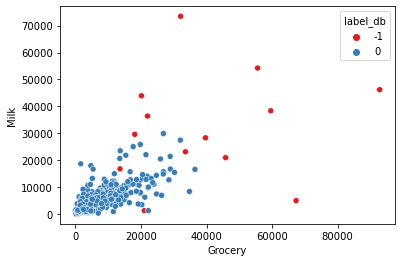

In [28]:
sns.scatterplot(data=df, x='Grocery', y='Milk', hue='label_db', palette='Set1');

### K-Means

In [29]:
km = KMeans(2)
label_km = km.fit_predict(scaled_x)
df['label_km'] = label_km
df['label_km'].value_counts()

0    405
1     35
Name: label_km, dtype: int64

In [30]:
df.drop(columns='label_db').groupby(by='label_km').mean().round(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
label_km,,,,,,,,
0,1.27,2.55,11913.15,4389.91,5951.81,3046.04,1843.31,1302.29
1,1.94,2.46,13008.74,22069.80,31087.94,3371.54,14894.74,4100.46


In [33]:
pd.crosstab(df['label_km'],df['Channel'])

Channel,1,2
label_km,,
0,296,109
1,2,33


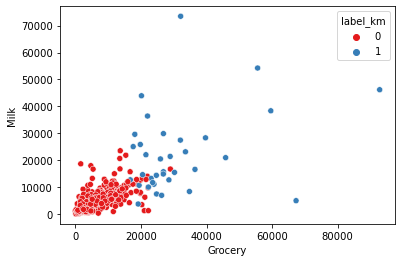

In [34]:
sns.scatterplot(data=df, x='Grocery', y='Milk', hue='label_km', palette='Set1');

For this particular dataset, K-Means actually performs rather well, and we are able to recover the 'Channel category provided with the data by means of K-Means clustering algorithm, after exlcuding those labels.